## Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

In [3]:
df = pd.read_csv('../datasets/kraken.csv').set_index('id')

In [6]:
df.columns

Index(['ligand', 'can_smiles', 'smiles', 'smiles(dft_sheet)',
       'vmin_vmin_boltz', 'vmin_r_boltz', 'fmo_e_homo_boltz',
       'fmo_e_lumo_boltz', 'fmo_mu_boltz', 'fmo_eta_boltz',
       ...
       'CPO', 'P[N]3', 'P(OR)3', 'Phosphoramidite', 'PON2', 'PXY', '[Fe]',
       'Buchwald', 'PPhR2', 'Cy2PR'],
      dtype='object', length=223)

In [4]:
df_feat = pd.read_csv('../datasets/kraken_features_only.csv').set_index('id')

In [5]:
df_feat

,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,nbo_P_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
id,,,,,,,,,,,,,,,,,,,,,
1,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,-0.363712,0.801914,...,7.439480,6.306577,7.835474,1.528897,7.262693,7.291573,7.106519,8.238802,1.132283,7.735548
2,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,-0.345264,0.816302,...,6.572514,6.339063,7.850955,1.511892,6.407769,7.285463,6.908743,8.216943,1.308200,7.992698
3,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,-0.356952,0.796412,...,7.156276,6.349086,7.287324,0.938238,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874
4,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,-0.349017,0.798225,...,7.238774,6.369287,7.813010,1.443723,7.653520,7.338674,6.996319,8.333428,1.337110,7.483233
5,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,-0.376125,0.787516,...,6.497622,6.092458,7.055260,0.962802,6.376705,7.370445,7.021018,8.155038,1.134020,8.086289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,-0.043519,1.831832,-0.222460,0.006342,-0.108059,0.228803,0.025525,0.111694,-0.421189,1.029464,...,4.975459,4.685253,5.118151,0.432897,4.685253,6.375344,6.360998,7.288451,0.927454,7.288451
1523,-0.025254,1.966487,-0.245624,-0.013506,-0.129565,0.232118,0.036165,0.097873,-0.442222,0.811243,...,5.073111,4.620572,5.111930,0.491358,4.974938,6.051645,5.709671,7.202777,1.493106,7.154725
1524,-0.040832,1.900163,-0.235760,-0.036640,-0.136200,0.199120,0.046581,0.072990,-0.451850,0.267470,...,5.399935,5.399935,5.399935,0.000000,5.399935,7.422573,7.422573,7.422573,0.000000,7.422573


## Get indexes from each class of ligand

In [11]:
indexes_SI = [ 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 981, 2000, 1079, 1080, 1081, 1082] #indexes not to consider for PCA according to the SI

In [12]:
df_2 = df.drop(index=indexes_SI)

In [13]:
df_PC3 = df_2[(df_2['PC3']==1.0) | (df_2['PAr3']==1.0) ]
df_PCO = df_2[df_2['CPO']==1.0]
df_PO3 = df_2[df_2['P(OR)3']==1.0]
df_PON = df_2[(df_2['PON2']==1.0) | ((df_2['PO']==1.0) & (df_2['PN']==1.0))]
df_PN3 = df_2[df_2['P[N]3']==1.0]
df_PCN = df_2[(df_2['CPN'] == 1.0) | ((df_2['PC'] == 1.0) & (df_2['PN'] == 1.0))]
df_PF = df_2[df_2['PF']==1.0]
df_PSi = df_2[df_2['PSi']==1.0]

## j'ai laissé tomber df_others car difficile de comprendre ce que contient la class 'others'

## Get features for each class

In [26]:
X = df_feat.to_numpy()

In [32]:
X_PC3 = df_feat.loc[df_PC3.index].to_numpy()
X_PCO = df_feat.loc[df_PCO.index].to_numpy()
X_PO3 = df_feat.loc[df_PO3.index].to_numpy()
X_PON = df_feat.loc[df_PON.index].to_numpy()
X_PN3 = df_feat.loc[df_PN3.index].to_numpy()
X_PCN = df_feat.loc[df_PCN.index].to_numpy()
X_PF = df_feat.loc[df_PF.index].to_numpy()
X_PSi = df_feat.loc[df_PSi.index].to_numpy()

In [24]:
X_PSi

array([[-0.0463058 ,  1.90015397, -0.23041   , ...,  7.17713411,
         0.        ,  7.17713411],
       [-0.0470909 ,  1.87501087, -0.21769   , ...,  7.53710425,
         0.        ,  7.53710425],
       [-0.0537357 ,  1.85476331, -0.22309   , ...,  7.32935768,
         0.        ,  7.32935768],
       ...,
       [-0.0442259 ,  1.92556611, -0.24197   , ...,  7.49226438,
         0.        ,  7.49226438],
       [-0.0408321 ,  1.9001627 , -0.23576   , ...,  7.42257267,
         0.        ,  7.42257267],
       [-0.03876608,  1.90987988, -0.22587613, ...,  7.23635535,
         0.07141741,  7.16494563]])

In [17]:
df.loc[df_PSi.index]

,ligand,can_smiles,smiles,smiles(dft_sheet),vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,...,CPO,P[N]3,P(OR)3,Phosphoramidite,PON2,PXY,[Fe],Buchwald,PPhR2,Cy2PR
id,,,,,,,,,,,,,,,,,,,,,
110,PTMS3,C[Si](C)(C)P([Si](C)(C)C)[Si](C)(C)C,C[Si](P([Si](C)(C)C)[Si](C)(C)C)(C)C,C[Si](C)(C)P([Si](C)(C)C)[Si](C)(C)C,-0.046306,1.900154,-0.230410,0.024370,-0.103020,0.254780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,P(TMS)Ph2,C[Si](C)(C)P(c1ccccc1)c1ccccc1,[Si](P(c1ccccc1)c1ccccc1)(C)(C)C,C[Si](C)(C)P(c1ccccc1)c1ccccc1,-0.047091,1.875011,-0.217690,-0.029880,-0.123785,0.187810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,PtBuTMS2,CC(C)(C)P([Si](C)(C)C)[Si](C)(C)C,[Si](P([Si](C)(C)C)C(C)(C)C)(C)(C)C,CC(C)(C)P([Si](C)(C)C)[Si](C)(C)C,-0.053736,1.854763,-0.223090,0.010240,-0.106425,0.233330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,PTMS2Ph,C[Si](C)(C)P(c1ccccc1)[Si](C)(C)C,C[Si](C)(C)P([Si](C)(C)C)C1=CC=CC=C1,C[Si](C)(C)P(c1ccccc1)[Si](C)(C)C,-0.048423,1.873775,-0.228360,-0.021950,-0.125155,0.206410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
772,TMS Phosphorinane,C[Si](C)(C)P1CCCCC1,C[Si](C)(C)P1CCCCC1,C[Si](C)(C)P1CCCCC1,-0.059123,1.823487,-0.223810,0.025472,-0.099169,0.249283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,PCy2DMPS,C[Si](C)(c1ccccc1)P(C1CCCCC1)C1CCCCC1,C[Si](C)(C1=CC=CC=C1)P(C2CCCCC2)C3CCCCC3,C[Si](C)(c1ccccc1)P(C1CCCCC1)C1CCCCC1,-0.058961,1.818154,-0.219773,-0.022700,-0.121236,0.197073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1007,PTMSiPr2,CC(C)P(C(C)C)[Si](C)(C)C,CC(C)P(C(C)C)[Si](C)(C)C,CC(C)P(C(C)C)[Si](C)(C)C,-0.059994,1.825718,-0.221761,0.020395,-0.100683,0.242156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,TMS P-bicyclononane,C[Si](C)(C)P1C2CCCC1CCC2,C[Si](P1C2CCCC1CCC2)(C)C,C[Si](C)(C)P1C2CCCC1CCC2,-0.060606,1.823344,-0.217866,0.017871,-0.099998,0.235737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1447,P(TMS)2(DMPS),C[Si](C)(C)P([Si](C)(C)C)[Si](C)(C)c1ccccc1,C[Si](C)(C1=CC=CC=C1)P([Si](C)(C)C)[Si](C)(C)C,C[Si](C)(C)P([Si](C)(C)C)[Si](C)(C)c1ccccc1,-0.043882,1.901318,-0.231067,-0.023628,-0.127347,0.207439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
std_scale = StandardScaler()
PCA_tot = PCA()

In [29]:
scaler = std_scale.fit(X)
X= scaler.transform(X)

In [30]:
PCA_tot.fit(X) #PCA is fitted on all the molecules

PCA()

In [33]:
X_PCA_tot = PCA_tot.transform(X)
X_PC3_tot = PCA_tot.transform(X_PC3)
X_PCO_tot = PCA_tot.transform(X_PCO)
X_PO3_tot = PCA_tot.transform(X_PO3)
X_PON_tot = PCA_tot.transform(X_PON)
X_PN3_tot = PCA_tot.transform(X_PN3)
X_PCN_tot = PCA_tot.transform(X_PCN)
X_PF_tot = PCA_tot.transform(X_PF)
X_PSi_tot = PCA_tot.transform(X_PSi)

In [50]:
pd.DataFrame(X_PCA_tot)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,11.146999,0.575411,7.390383,-4.352125,2.076040,-1.527131,0.478628,-2.881492,2.035563,0.063108,...,1.104204e-10,5.735059e-11,-4.537902e-10,1.736223e-10,-1.415398e-10,2.021025e-10,-4.428589e-11,3.935481e-12,-1.216176e-11,-3.114091e-16
1,8.705594,1.661838,6.162984,-3.939194,0.516887,-0.158555,-1.551116,-1.927539,0.523588,1.824804,...,9.602561e-11,-2.331865e-10,7.819690e-11,9.899129e-11,-1.460175e-10,1.150505e-10,-6.193065e-11,3.212898e-12,-1.651606e-11,1.420144e-15
2,7.006813,1.658448,4.497080,-3.397214,-0.883842,-1.234211,-2.282228,-0.997596,0.702514,1.221254,...,-5.894745e-11,4.627078e-12,-1.952384e-10,7.654663e-13,-5.912670e-11,4.033085e-11,2.731022e-11,1.233190e-11,-3.927126e-11,-1.723735e-17
3,10.698928,-0.203930,7.171458,-4.241834,-0.463719,-0.557585,0.755254,-1.547374,-0.139988,0.536402,...,-1.728048e-10,-3.656669e-10,-9.718427e-11,2.283241e-10,1.786949e-10,7.052949e-11,8.958839e-11,-3.402409e-12,-8.228496e-11,-1.334989e-15
4,5.117583,2.393662,5.963274,-3.614994,-0.894985,-0.129252,-1.538130,-2.297155,0.455266,1.673631,...,2.100332e-10,1.844920e-10,-2.427929e-10,9.746057e-11,5.544300e-11,-9.382468e-11,4.457014e-11,3.151951e-12,3.897263e-11,1.459023e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,-9.870620,2.255522,2.690314,2.487231,-0.847002,-0.124954,-1.127133,0.490595,0.301458,-0.845958,...,1.673574e-11,-1.364398e-10,-1.959478e-10,2.952569e-12,8.770798e-11,4.264204e-11,5.220605e-11,2.878663e-12,-5.620771e-11,-1.602610e-15
1219,-12.168878,-2.001433,3.235110,2.357354,-1.929313,-1.592895,0.161922,-0.305405,2.364146,-0.908908,...,3.386464e-11,-1.918038e-10,1.908909e-10,4.914986e-11,-3.815475e-11,1.252081e-10,-4.685964e-11,2.225633e-11,2.135930e-11,1.406254e-15
1220,-9.950837,0.700796,-1.619724,2.360370,1.909350,-3.983365,1.202364,-3.197037,2.020230,1.248616,...,-6.394755e-11,-9.945016e-11,-1.647683e-11,-7.125737e-11,-3.561340e-11,6.377370e-12,-2.229604e-11,-3.886839e-11,-7.314571e-12,-1.613224e-15
1221,-18.138124,-5.134385,4.022153,5.252291,0.380364,-1.725794,2.659118,-3.026545,4.137465,-0.157536,...,9.551241e-11,-5.255047e-11,-9.615113e-11,1.680775e-11,-1.015358e-10,1.527527e-11,1.977996e-11,1.327403e-11,-2.670942e-12,8.935119e-16


Text(0.5, 0, 'PC 1')

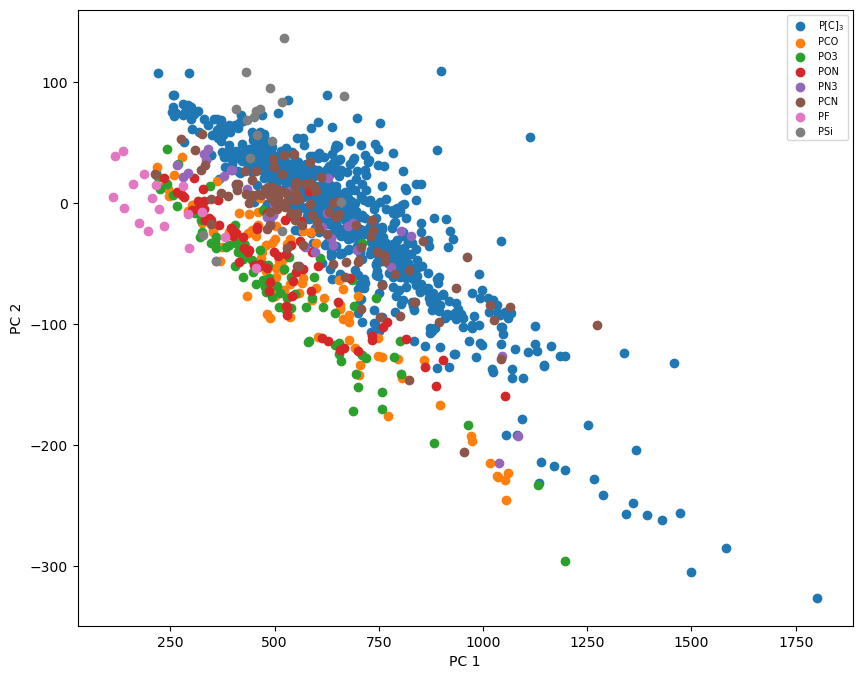

In [41]:
fig = plt.figure(figsize=(10, 8))

plt.scatter(X_PC3_tot[:,0], X_PC3_tot[:,1], label = 'P[C]$_3$')
plt.scatter(X_PCO_tot[:,0], X_PCO_tot[:,1], label = 'PCO')
plt.scatter(X_PO3_tot[:,0], X_PO3_tot[:,1], label = 'PO3')
plt.scatter(X_PON_tot[:,0], X_PON_tot[:,1], label = 'PON')
plt.scatter(X_PN3_tot[:,0], X_PN3_tot[:,1], label = 'PN3')
plt.scatter(X_PCN_tot[:,0], X_PCN_tot[:,1], label = 'PCN')
plt.scatter(X_PF_tot[:,0], X_PF_tot[:,1], label = 'PF')
plt.scatter(X_PSi_tot[:,0], X_PSi_tot[:,1], label = 'PSi')


plt.legend(fontsize = 7)
plt.ylabel('PC 2')
plt.xlabel('PC 1')

## PCA donnée dans le SI

In [64]:
df_dim_red = pd.read_excel('SI/descriptors.xlsx', sheet_name = 'reduced_features_DFT')

Text(0.5, 0, 'PC 1')

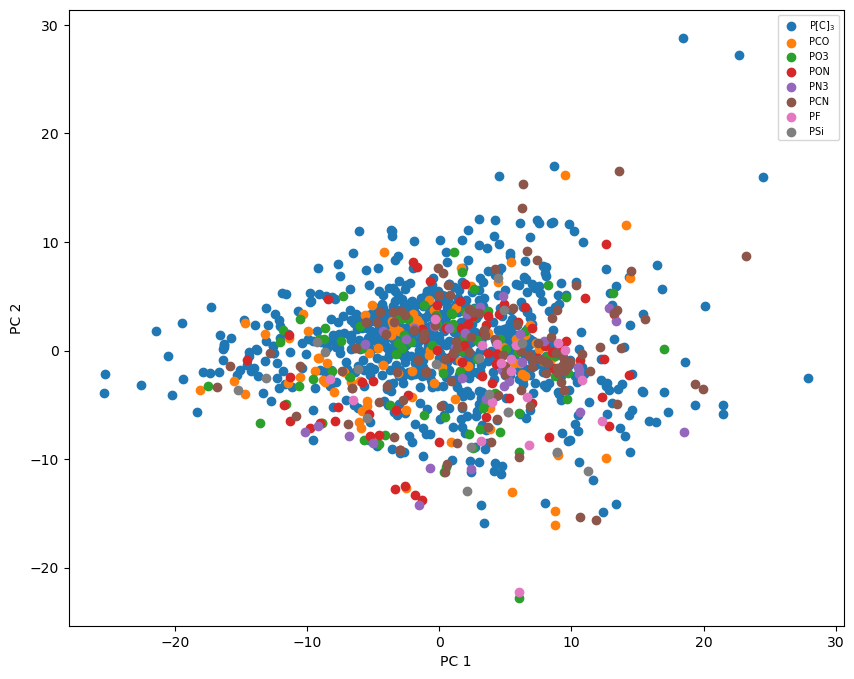

In [65]:
fig = plt.figure(figsize=(10, 8))

plt.scatter(df_dim_red.loc[df_PC3.index, 'PC1'], df_dim_red.loc[df_PC3.index, 'PC2'], label='P[C]$_3$')
plt.scatter(df_dim_red.loc[df_PCO.index, 'PC1'], df_dim_red.loc[df_PCO.index, 'PC2'], label='PCO')
plt.scatter(df_dim_red.loc[df_PO3.index, 'PC1'], df_dim_red.loc[df_PO3.index, 'PC2'], label='PO3')
plt.scatter(df_dim_red.loc[df_PON.index, 'PC1'], df_dim_red.loc[df_PON.index, 'PC2'], label='PON')
plt.scatter(df_dim_red.loc[df_PN3.index, 'PC1'], df_dim_red.loc[df_PN3.index, 'PC2'], label='PN3')
plt.scatter(df_dim_red.loc[df_PCN.index, 'PC1'], df_dim_red.loc[df_PCN.index, 'PC2'], label='PCN')
plt.scatter(df_dim_red.loc[df_PF.index, 'PC1'], df_dim_red.loc[df_PF.index, 'PC2'], label='PF')
plt.scatter(df_dim_red.loc[df_PSi.index, 'PC1'], df_dim_red.loc[df_PSi.index, 'PC2'], label='PSi')

plt.legend(fontsize=7)
plt.ylabel('PC 2')
plt.xlabel('PC 1')

## UMAP donnée dans le SI

Text(0.5, 0, 'umap1')

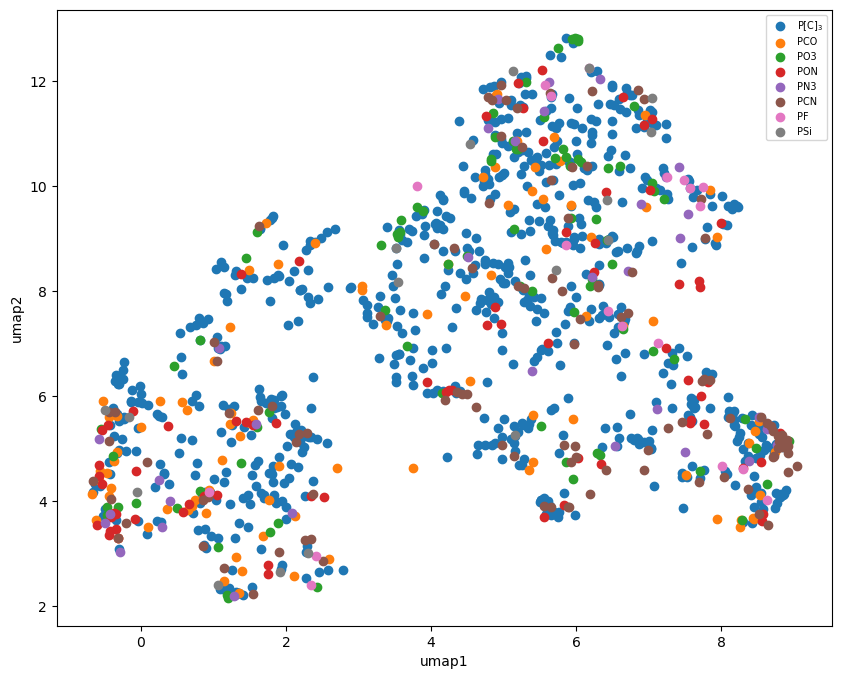

In [66]:
fig = plt.figure(figsize=(10, 8))

plt.scatter(df_dim_red.loc[df_PC3.index, 'umap1'], df_dim_red.loc[df_PC3.index, 'umap2'], label='P[C]$_3$')
plt.scatter(df_dim_red.loc[df_PCO.index, 'umap1'], df_dim_red.loc[df_PCO.index, 'umap2'], label='PCO')
plt.scatter(df_dim_red.loc[df_PO3.index, 'umap1'], df_dim_red.loc[df_PO3.index, 'umap2'], label='PO3')
plt.scatter(df_dim_red.loc[df_PON.index, 'umap1'], df_dim_red.loc[df_PON.index, 'umap2'], label='PON')
plt.scatter(df_dim_red.loc[df_PN3.index, 'umap1'], df_dim_red.loc[df_PN3.index, 'umap2'], label='PN3')
plt.scatter(df_dim_red.loc[df_PCN.index, 'umap1'], df_dim_red.loc[df_PCN.index, 'umap2'], label='PCN')
plt.scatter(df_dim_red.loc[df_PF.index, 'umap1'], df_dim_red.loc[df_PF.index, 'umap2'], label='PF')
plt.scatter(df_dim_red.loc[df_PSi.index, 'umap1'], df_dim_red.loc[df_PSi.index, 'umap2'], label='PSi')

plt.legend(fontsize=7)
plt.ylabel('umap2')
plt.xlabel('umap1')

#### UMAP

C:\Users\Juliette\miniconda3\envs\thesis\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


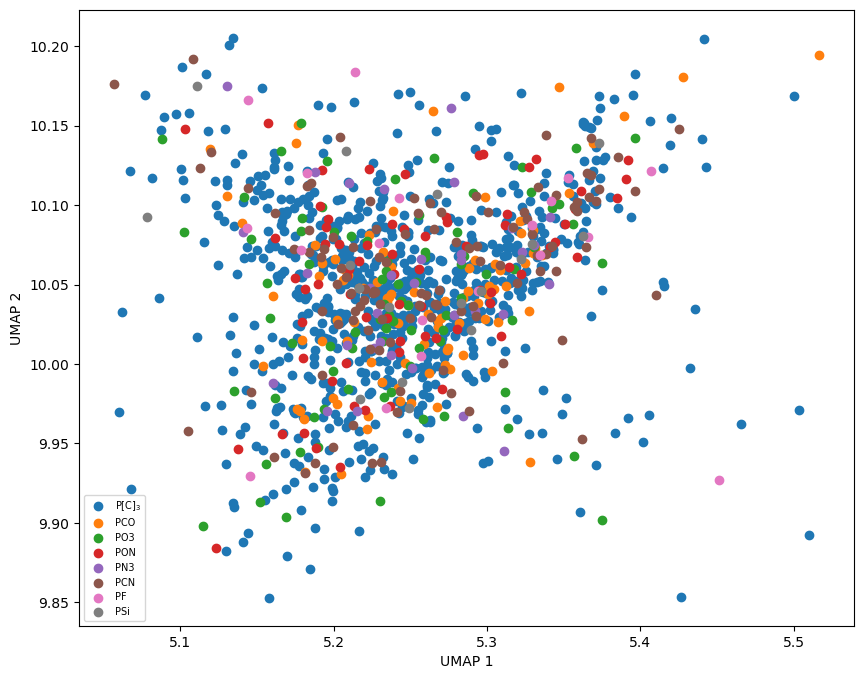

In [49]:
import umap
import matplotlib.pyplot as plt

# Créer un objet UMAP et ajuster/transormer les données
umap_tot = umap.UMAP(random_state =42)
X_UMAP_tot = umap_tot.fit_transform(X)
X_PC3_tot = umap_tot.transform(X_PC3)
X_PCO_tot = umap_tot.transform(X_PCO)
X_PO3_tot = umap_tot.transform(X_PO3)
X_PON_tot = umap_tot.transform(X_PON)
X_PN3_tot = umap_tot.transform(X_PN3)
X_PCN_tot = umap_tot.transform(X_PCN)
X_PF_tot = umap_tot.transform(X_PF)
X_PSi_tot = umap_tot.transform(X_PSi)

# Création de la figure pour visualisation
fig = plt.figure(figsize=(10, 8))

# Scatter plots pour chaque groupe de données
plt.scatter(X_PC3_tot[:,0], X_PC3_tot[:,1], label='P[C]$_3$')
plt.scatter(X_PCO_tot[:,0], X_PCO_tot[:,1], label='PCO')
plt.scatter(X_PO3_tot[:,0], X_PO3_tot[:,1], label='PO3')
plt.scatter(X_PON_tot[:,0], X_PON_tot[:,1], label='PON')
plt.scatter(X_PN3_tot[:,0], X_PN3_tot[:,1], label='PN3')
plt.scatter(X_PCN_tot[:,0], X_PCN_tot[:,1], label='PCN')
plt.scatter(X_PF_tot[:,0], X_PF_tot[:,1], label='PF')
plt.scatter(X_PSi_tot[:,0], X_PSi_tot[:,1], label='PSi')

# Ajouter la légende
plt.legend(fontsize=7)

# Ajouter des étiquettes aux axes
plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')

# Afficher le graphique
plt.show()

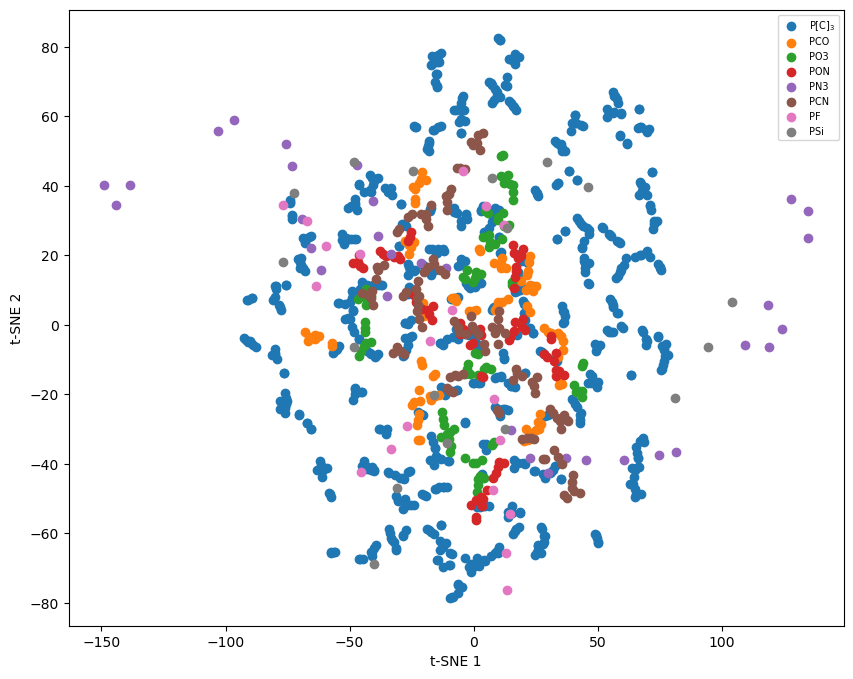

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Créer un objet t-SNE et ajuster/transformer les données
tsne_tot = TSNE(n_components=2, learning_rate='auto',
                init='random', perplexity=3)
X_TSNE_tot = tsne_tot.fit_transform(X)
X_PC3_tot = tsne_tot.fit_transform(X_PC3)
X_PCO_tot = tsne_tot.fit_transform(X_PCO)
X_PO3_tot = tsne_tot.fit_transform(X_PO3)
X_PON_tot = tsne_tot.fit_transform(X_PON)
X_PN3_tot = tsne_tot.fit_transform(X_PN3)
X_PCN_tot = tsne_tot.fit_transform(X_PCN)
X_PF_tot = tsne_tot.fit_transform(X_PF)
X_PSi_tot = tsne_tot.fit_transform(X_PSi)

# Création de la figure pour visualisation
fig = plt.figure(figsize=(10, 8))

# Scatter plots pour chaque groupe de données
plt.scatter(X_PC3_tot[:, 0], X_PC3_tot[:, 1], label='P[C]$_3$')
plt.scatter(X_PCO_tot[:, 0], X_PCO_tot[:, 1], label='PCO')
plt.scatter(X_PO3_tot[:, 0], X_PO3_tot[:, 1], label='PO3')
plt.scatter(X_PON_tot[:, 0], X_PON_tot[:, 1], label='PON')
plt.scatter(X_PN3_tot[:, 0], X_PN3_tot[:, 1], label='PN3')
plt.scatter(X_PCN_tot[:, 0], X_PCN_tot[:, 1], label='PCN')
plt.scatter(X_PF_tot[:, 0], X_PF_tot[:, 1], label='PF')
plt.scatter(X_PSi_tot[:, 0], X_PSi_tot[:, 1], label='PSi')

# Ajouter la légende
plt.legend(fontsize=7)

# Ajouter des étiquettes aux axes
plt.ylabel('t-SNE 2')
plt.xlabel('t-SNE 1')

# Afficher le graphique
plt.show()
